# Project: Investigating the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Movie genre popularity over the most recent 10 years

For this project I will be investigating a dataset containing information of 10,866 different movies.  This data was provided by <a href="https://www.themoviedb.org/">The Movie Database</a>.  This table contains a wealth of fields, but for the purpose of this project, I really only need access to movie genre trends.  The main questions that I will pose are as follows, but I know that I will have to answer more than just that along the way.

> How many movies were released each year?

> Which are the biggest genres overall?

> How did the top genre fluctuate year over year?


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

Now I'm going to read in data from the CSV file, and display it in a table.

In [51]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's see what column headers we've got here

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning
##### Removing irrelevant columns
> We're starting off with 10866 entries, and 21 columns.  As mentioned before, we definitely do not need all of the fields provided.  Columns that we will be dropping
-  imdb_id
-  popularity
-  homepage
-  tagline
-  keywords
-  overview
-  production_companies
-  release_date (we just need the year)
-  vote_count
-  budget
-  revenue

In [53]:
df.drop(['imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'budget', 'revenue'], axis=1, inplace=True)


Now let's see which columns that we're left with.  There should only be 11.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 849.0+ KB


##### Removing invalid rows
Now I'm going to get rid of records with null and zero values so that it doesn't skew the results. (using ID as a unique identifier for every entry)

Let's see if anything is duplicated (display the sum of duplicate entries)

In [55]:
sum(df.duplicated())

1

Looks like there's one, let's drop it.

In [56]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Now let's check for empties.

In [57]:
df.isnull().sum()

id                 0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Hmmm...quite a few blank entries.  Let's drop 'em.

In [58]:
# df.genres.dropna()
df.dropna(axis=0, inplace=True)

So, now what are we left with?

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
id                10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 922.2+ KB


Now I am going to remove zero-values from numeric fields, so they don't skew the data.

In [60]:
# return only rows where {values} do not equal zero
df = df[df.runtime != 0]
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 10 columns):
id                3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 330.8+ KB


All right, now I've got 3849 movies left.  I don't want to include too many results, as that will make it more difficult to visualize.  I only want to capture data from the most recent 10 years (which will be 2006-2015).

In [61]:
# remove movies that were released pre-2006
df_decade = df[df.release_year > 2005]
df_decade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 0 to 7819
Data columns (total 10 columns):
id                1712 non-null int64
original_title    1712 non-null object
cast              1712 non-null object
director          1712 non-null object
runtime           1712 non-null int64
genres            1712 non-null object
vote_average      1712 non-null float64
release_year      1712 non-null int64
budget_adj        1712 non-null float64
revenue_adj       1712 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 147.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are the most popular?
To start, let's quickly take a look at the volume of overall movie releases over the years.
##### Note
This is not all-inclusive, as we removed records that contained incomplete data.  

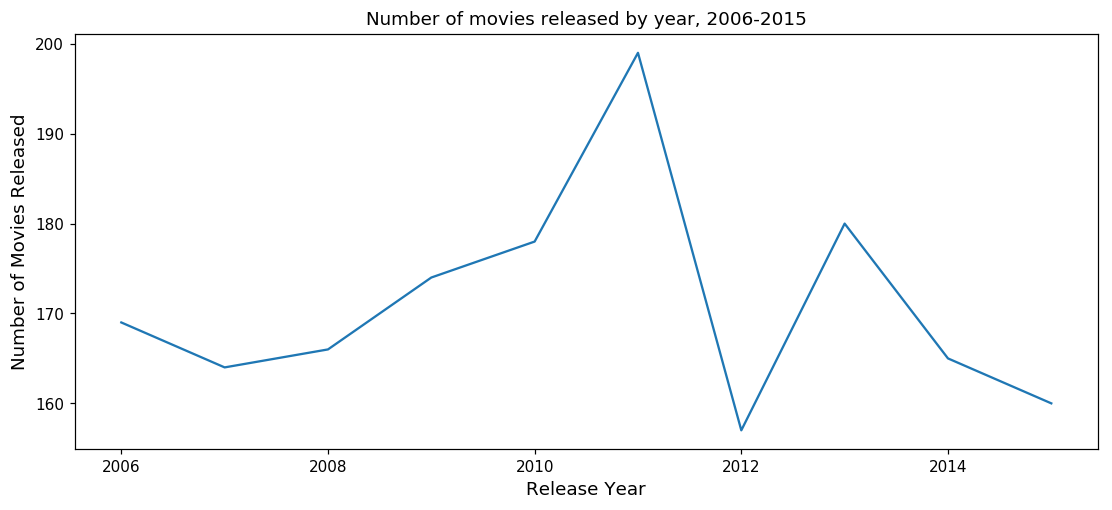

In [62]:
# total number of movies left on the list and when they were released
py = df_decade.groupby('release_year')['id'].count()
py = pd.DataFrame(py)
plt.figure(figsize=(12,5), dpi = 110)

# let's label the axes
plt.xlabel('Release Year', color='black', fontsize = 12)
plt.ylabel('Number of Movies Released',color='black', fontsize = 12)
plt.title('Number of movies released by year, 2006-2015',color='black')

# plot the data
plt.plot(py)

# display the plot
plt.show()

Looks like 2011 was a big year for movies!  Then immediately after, the industry experienced a 10-year low in 2012. <br><br>
Time to turn this raw data into useful information.  I need to make a list of movie genres.  Some of the movies are categorized under multiple genres, separated by pipes.

In [63]:
# make a list - split the contents of the "Genres" field in each row by the pipe character, then put them back together (concatenate) as a list
genres = list(set(df_decade.genres.str.cat(sep ='|').split('|')))
genres

['Comedy',
 'Action',
 'Documentary',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'Western',
 'Music',
 'Animation',
 'Mystery',
 'Horror',
 'Drama',
 'Adventure',
 'War',
 'Crime',
 'Foreign',
 'History',
 'Family',
 'Thriller']

I must take into account movies that have more than one genre (they get a row for each genre)

In [64]:
# Drop the field 'genres' from the row
# Split the contents of the Genres field
# Create a stack 
# 'rename' the values in the stack to be the new Genres field


# when dropping, also drop the column name

genres_split = (df_decade.drop('genres', axis=1)
             .join
             (
             df_decade.genres
             .str
             .split('|', expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('genres')           
             ))
genres_split.head()

,id,original_title,cast,director,runtime,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,7.1,2015,1.379999e+08,3.481613e+08,Action


It worked!  We can see here that Jurassic World was categorized into 4 different genres.  Let's keep this in mind, knowing that we started with a list of 1543 (after the cleaning).

In [65]:
newcount = genres_split.id.count()
newcount

4427

Creating new entries for each genre per movie almost tripled the results.

##### Top 10 Genres from 2006-2015
Now I want to create a quick "Top Ten" chart.  I am going to group movies by their genres, and then tally the totals.  I will then order the results from highest to lowest.  

In [66]:
# let's start by just getting a count from the list of genres ordered by number of movies
genres_count = (genres_split.groupby('genres', as_index=False).id.count()
                             .sort_values(by='id', ascending=False))
# only display first 10
genres_count[0:9]

,genres,id
6,Drama,806
3,Comedy,584
16,Thriller,525
0,Action,452
1,Adventure,315
14,Romance,278
4,Crime,263
15,Science Fiction,210
7,Family,192


#### Number of Movies Across All Genres Over 10 Years

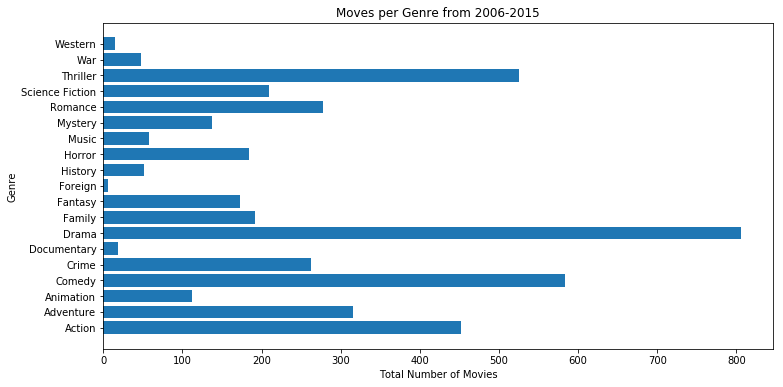

In [67]:
# create a horizontal bar chart to visualize the number of movies per genre
plt.figure(1, figsize=(12,6))
plt.xlabel('Total Number of Movies')
plt.ylabel('Genre')
plt.title('Moves per Genre from 2006-2015')

plt.barh(genres_count['genres'],genres_count['id'])
plt.show()

Given the data presented, it is clear that Dramas were the most popular over those 10 years, overall.  
### Which genre was at the top each year?

In [68]:
# create variable to store the range of years in our dataframe
years = range(df_decade['release_year'].min(), df_decade['release_year'].max()+1) 
years

range(2006, 2016)

In [69]:
# create new dataframe using years as the index and genres as column headers
genre_by_year = pd.DataFrame(index = years, columns = genres)

# empty dataframe is created with NAN value in every cell
# replace all NAN values with zeroes so we can iterate & add to the counts
genre_by_year = genre_by_year.fillna(0)

# view first 5 rows of our new dataframe
genre_by_year.head(5)

,Comedy,Action,Documentary,Fantasy,Science Fiction,Romance,Western,Music,Animation,Mystery,Horror,Drama,Adventure,War,Crime,Foreign,History,Family,Thriller
2006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# populate the new dataframe by iterating over the dataset and incrementing the year and genre cells
for row in df_decade.itertuples():
    genres_by_row = row.genres.split('|')
    year = row.release_year
    #for every genre in genres_by_row, replace the value and then increment by 1
    for genre in genres_by_row:
        genre_by_year.loc[year, genre] = genre_by_year.loc[year, genre] + 1
        
# veiw first 5 rows of the populated dataframe
genre_by_year.head(5)

,Comedy,Action,Documentary,Fantasy,Science Fiction,Romance,Western,Music,Animation,Mystery,Horror,Drama,Adventure,War,Crime,Foreign,History,Family,Thriller
2006,64,38,3,18,13,29,1,4,12,15,15,89,33,6,27,0,8,26,52
2007,54,40,4,20,13,31,2,9,9,18,28,75,24,3,36,1,6,18,54
2008,58,52,1,18,26,32,1,4,11,15,9,80,40,9,27,2,7,20,52
2009,66,41,1,19,31,36,0,6,12,21,20,83,34,3,22,0,5,24,54
2010,69,52,4,21,16,32,3,1,10,16,22,84,31,1,27,3,4,22,54


#### What was the most popular genre for each year?

In [71]:
#   Figure out which genre was the top 
genre_by_year['TopGenre'] = genre_by_year.idxmax(axis=1)
dtype: object
genre_by_year.head(10)

,Comedy,Action,Documentary,Fantasy,Science Fiction,Romance,Western,Music,Animation,Mystery,Horror,Drama,Adventure,War,Crime,Foreign,History,Family,Thriller,TopGenre
2006,64,38,3,18,13,29,1,4,12,15,15,89,33,6,27,0,8,26,52,Drama
2007,54,40,4,20,13,31,2,9,9,18,28,75,24,3,36,1,6,18,54,Drama
2008,58,52,1,18,26,32,1,4,11,15,9,80,40,9,27,2,7,20,52,Drama
2009,66,41,1,19,31,36,0,6,12,21,20,83,34,3,22,0,5,24,54,Drama
2010,69,52,4,21,16,32,3,1,10,16,22,84,31,1,27,3,4,22,54,Drama
2011,72,58,4,19,23,33,2,6,14,16,16,89,32,4,25,0,3,24,63,Drama
2012,54,41,1,15,23,26,1,7,11,7,19,66,25,5,24,0,2,12,55,Drama
2013,47,49,0,16,20,21,2,7,14,7,20,80,33,2,34,0,8,19,53,Drama
2014,48,44,0,14,23,20,1,5,10,9,18,79,29,9,17,0,4,14,41,Drama
2015,52,37,0,13,22,18,2,9,9,13,17,81,34,5,24,0,5,13,47,Drama


In [72]:
# let's start by just getting a count of each genre that had the most movies for each year
genres_top = (genre_by_year.groupby('TopGenre').TopGenre.count()
                             .sort_values())
genres_top.head()

TopGenre
Drama    10
Name: TopGenre, dtype: int64

Well, that was anticlimatic.  Drama was the top genre for every year between 2006-2015.  I already knew that drama was going to be the most popular, but I didn't expect it to be the top genre of *every single* year.

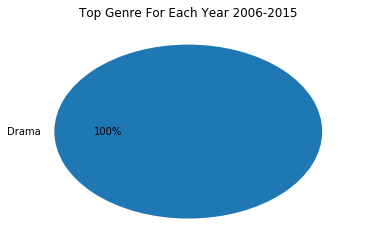

In [73]:
# plot percentage of each genre in a pie chart, use the keys as label
plt.pie(genres_top, labels = genres_top.keys(), autopct = '%.0f%%')
plt.title("Top Genre For Each Year 2006-2015")
plt.show()

Exciting stuff here, folks.  Since the results were less than diverse, let's explore the drama genre further.  **What's in the average drama flick?**

In [77]:
# strip the dataframe down to only movies in the drama genre
df_drama = genres_split.loc[genres_split['genres'] == 'Drama']
df_drama.head()

,id,original_title,cast,director,runtime,vote_average,release_year,budget_adj,revenue_adj,genres
5,281957,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,7.2,2015,1.241999e+08,4.903142e+08,Drama
7,286217,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,7.6,2015,9.935996e+07,5.477497e+08,Drama
12,264660,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,7.6,2015,1.379999e+07,3.391985e+07,Drama
15,273248,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,7.4,2015,4.047998e+07,1.432992e+08,Drama
18,150689,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,Kenneth Branagh,112,6.8,2015,8.739996e+07,4.989630e+08,Drama


In [78]:
# separate all actors out into a list
actors = list(df_drama.cast.str.cat(sep ='|').split('|'))
actors

['Leonardo DiCaprio',
 'Tom Hardy',
 'Will Poulter',
 'Domhnall Gleeson',
 'Paul Anderson',
 'Matt Damon',
 'Jessica Chastain',
 'Kristen Wiig',
 'Jeff Daniels',
 'Michael PeÃ±a',
 'Domhnall Gleeson',
 'Alicia Vikander',
 'Oscar Isaac',
 'Sonoya Mizuno',
 'Corey Johnson',
 'Samuel L. Jackson',
 'Kurt Russell',
 'Jennifer Jason Leigh',
 'Walton Goggins',
 'DemiÃ¡n Bichir',
 'Lily James',
 'Cate Blanchett',
 'Richard Madden',
 'Helena Bonham Carter',
 'Holliday Grainger',
 'Jake Gyllenhaal',
 'Rachel McAdams',
 'Forest Whitaker',
 'Oona Laurence',
 '50 Cent',
 'Dwayne Johnson',
 'Alexandra Daddario',
 'Carla Gugino',
 'Ioan Gruffudd',
 'Archie Panjabi',
 'Dakota Johnson',
 'Jamie Dornan',
 'Jennifer Ehle',
 'Eloise Mumford',
 'Victor Rasuk',
 'Christian Bale',
 'Steve Carell',
 'Ryan Gosling',
 'Brad Pitt',
 'Melissa Leo',
 'Mark Ruffalo',
 'Michael Keaton',
 'Rachel McAdams',
 'Liev Schreiber',
 'John Slattery',
 'Tom Hanks',
 'Mark Rylance',
 'Amy Ryan',
 'Alan Alda',
 'Sebastian Koch'

In [79]:
# find the most common actor
common_actor = Counter(actors)
common_actor.most_common()
common_actor.most_common(1)

[('Matt Damon', 17)]

In [86]:
# separate all directors out into a list
directors = list(df_drama.director.str.cat(sep ='|').split('|'))
directors

['Alejandro GonzÃ¡lez IÃ±Ã¡rritu',
 'Ridley Scott',
 'Alex Garland',
 'Quentin Tarantino',
 'Kenneth Branagh',
 'Antoine Fuqua',
 'Brad Peyton',
 'Sam Taylor-Johnson',
 'Adam McKay',
 'Tom McCarthy',
 'Steven Spielberg',
 'Lenny Abrahamson',
 'Jaume Collet-Serra',
 'John Crowley',
 'F. Gary Gray',
 'Danny Boyle',
 'Lee Toland Krieger',
 'Jake Schreier',
 'Yorgos Lanthimos',
 'Todd Haynes',
 'Baltasar KormÃ¡kur',
 'David O. Russell',
 'John Wells',
 'Tom Hooper',
 'Michael Mann',
 'Denis Villeneuve',
 'Glenn Ficarra',
 'John Requa',
 'Ron Howard',
 'Ryan Coogler',
 'Gavin Hood',
 'Peter Landesman',
 'Eli Roth',
 'George Tillman, Jr.',
 'Robert Zemeckis',
 'Daniel Benmayor',
 'Jocelyn Moorhouse',
 'Scott Cooper',
 'Gilles Paquet-Brenner',
 'Rick Famuyiwa',
 'Simon Curtis',
 'Guillermo del Toro',
 'Gregory Jacobs',
 'Jay Roach',
 'Billy Ray',
 'Boaz Yakin',
 'Pierre Morel',
 'Leigh Whannell',
 'Nicholas Hytner',
 'Paul McGuigan',
 'Duke Johnson',
 'Charlie Kaufman',
 'Marielle Heller',
 '

In [87]:
# find the most common director
common_director = Counter(directors)
common_director.most_common()
common_director.most_common(1)

[('Clint Eastwood', 8)]

In [84]:
# calculate average runtime
avg_runtime = int(df_drama['runtime'].mean())
avg_runtime

112

In [85]:
# calculate average budget
avg_budget = int(df_drama['budget_adj'].mean())
avg_budget

28650891

There we have it, the makings of most drama films.

<a id='conclusions'></a>
### Conclusions

Based on the results of my investigation, it is clear to see that Drama has been the most popular movie genre over the most recent 10 years of data available in TMDB.  Not only was it the most frequently made genre overall, it was the top genre *every* year.  

I also observed that the number of movies produced in a year peaked in 2011, and then fell to a 10-year low in 2012.

#### What did most drama films have in common?

Matt Damon was featured in the most movies.
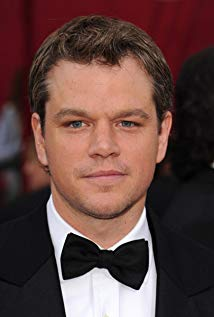

Clint Eastwood produced the most movies.
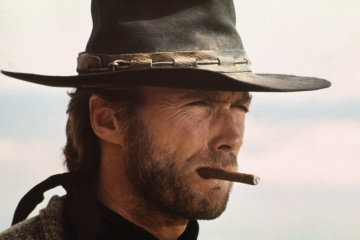

The average runtime was 112 minutes long.

The average production budget was $28,650,891.

#### Limitations
-- The scope of movies in the dataframe was trimmed down to only movies produced from 2006-2015.
-- There were many zero and null values in the dataframe, and when those were removed, the results were reduced to approximately 3/8 of the original volume.
-- I used the adjusted budget, as opposed to the original budget, to account for inflation over the years.
-- The drama genre frequently overlapped with other genres, as movies could be categorized under multiple genre.

### References

-  <a href="https://matplotlib.org/tutorials/introductory/pyplot.html">Pyplot Tutorial</a>
-  <a href="https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm">Tutorialspoint 
     Pandas Series Tutorial</a>
- https://pandas.pydata.org/pandas-docs/stable/reference
- https://github.com/turner-kevin/Investigate-a-Dataset
- https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list

In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0